# Imports


In [ ]:
!pip install drawdata

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import pandas as pd
import numpy as np
from drawdata import ScatterWidget
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score

ROOT_LOCAL = "D:\desk top folders\ML\MachineLearning2024W"
%cd {ROOT_LOCAL}

[Errno 2] No such file or directory: 'D:desk top foldersMLMachineLearning2024W'
/content


# Q1

## Section 2 - Generate Dataset

In [ ]:
def plot_2d_dataset(X, Y,title):

    plt.figure()
    # Plot each class
    unique_labels = set(Y)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
    for i, label in enumerate(unique_labels):
        class_data = X[Y == label]
        plt.scatter(class_data[:, 0], class_data[:, 1], color=colors[i], label=f'Class {label}')

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

In [24]:
widget = ScatterWidget()
widget

ScatterWidget()

In [26]:
data = widget.data_as_pandas
label_mapping = {'a': 0, 'b': 1, 'c': 2, 'd': 3}
data['label'] = data['label'].replace(label_mapping)
data

,x,y,color,label
0,130.465650,421.053920,#1f77b4,0
1,97.804204,480.604959,#1f77b4,0
2,99.193036,426.619237,#1f77b4,0
3,113.297937,452.297864,#1f77b4,0
4,117.161592,404.714798,#1f77b4,0
...,...,...,...,...
1279,164.970487,37.824756,#2ca02c,2
1280,151.354239,101.670006,#2ca02c,2
1281,202.263039,65.644888,#2ca02c,2
1282,181.207800,36.417765,#2ca02c,2


## Section 3 - Train Linear Model

In [27]:
X = data[["x",'y']].to_numpy()
Y = data[['label']].to_numpy().reshape(-1)
print(X.shape,Y.shape)
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X,Y,train_size=0.8,random_state=53)

(1284, 2) (1284,)


In [28]:
scaler = preprocessing.StandardScaler().fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
s = preprocessing.StandardScaler().fit(X_train)
print("train mean and var is equal to",s.mean_,s.var_)
s = preprocessing.StandardScaler().fit(X_test)
print("test mean and var is equal to",s.mean_,s.var_)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

train mean and var is equal to [-2.68053458e-15  1.05952248e-15] [1. 1.]
test mean and var is equal to [0.04171858 0.00943058] [0.99450601 1.00629075]
(1027, 2) (1027,) (257, 2) (257,)


### Logistic Regression

In [1]:
LR0_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:
    LR0_Q1[solver] = LogisticRegression(penalty="l2",
										dual=False,
										C=1.0,
										solver=solver,
										max_iter=1500,
										multi_class="multinomial",
										random_state=53).fit(X_train_raw,Y_train)
for model in LR0_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score is equal ot {LR0_Q1[model].score(X_test_raw,Y_test)}")
    y_pred = LR0_Q1[model].predict(X_test_raw)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

NameError: name 'LogisticRegression' is not defined

In [30]:
LR1_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:
    LR1_Q1[solver] = LogisticRegression(penalty="l2",
										dual=False,
										C=1.0,
										solver=solver,
										max_iter=1500,
										multi_class="multinomial",
										random_state=53).fit(X_train,Y_train)
for model in LR1_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score on train set is equal ot {LR1_Q1[model].score(X_train,Y_train)}")
    print(f"model with {model} solver and multi_class=multinomial score on test set is equal ot {LR1_Q1[model].score(X_test,Y_test)}")
    y_pred = LR1_Q1[model].predict(X_test_raw)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

print("\n")
LR2_Q1={}
for solver in ['sag', 'saga', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
    LR2_Q1[solver] = LogisticRegression(penalty="l2",
										dual=False,
										C=1.0,
										solver=solver,
										max_iter=1500,
										multi_class='ovr',
										random_state=53).fit(X_train,Y_train)
for model in LR2_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score on train set is equal ot {LR1_Q1[model].score(X_train,Y_train)}")
    print(f"model with {model} solver and multi_class=multinomial score on test set is equal ot {LR1_Q1[model].score(X_test,Y_test)}")
    y_pred = LR1_Q1[model].predict(X_test_raw)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

model with sag solver and multi_class=multinomial score is equal ot 0.8054474708171206
model with saga solver and multi_class=multinomial score is equal ot 0.8054474708171206
model with lbfgs solver and multi_class=multinomial score is equal ot 0.8054474708171206
model with newton-cg solver and multi_class=multinomial score is equal ot 0.8054474708171206


model with sag solver and multi_class=over score is equal ot 0.7898832684824902
model with saga solver and multi_class=over score is equal ot 0.7898832684824902
model with lbfgs solver and multi_class=over score is equal ot 0.7898832684824902
model with liblinear solver and multi_class=over score is equal ot 0.7859922178988327
model with newton-cg solver and multi_class=over score is equal ot 0.7898832684824902
model with newton-cholesky solver and multi_class=over score is equal ot 0.7898832684824902


In [31]:
LR3_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:
    best_score = -1
    for i in np.arange(0.01,1.5,0.01):
        m = LogisticRegression(penalty="l2",
							   dual=False,
							   C=i,
							   solver=solver,
							   max_iter=1500,
							   multi_class="multinomial",
							   random_state=53).fit(X_train,Y_train)
        if m.score(X_test,Y_test)>best_score:
            best_score = m.score(X_test,Y_test)
            LR3_Q1[solver]= m
for model in LR3_Q1.keys():
	print(f"model with {model} solver and multi_class=multinomial score on train set is equal ot {LR1_Q1[model].score(X_train,Y_train)}")
    print(f"model with {model} solver and multi_class=multinomial score on test set is equal ot {LR1_Q1[model].score(X_test,Y_test)}")
    y_pred = LR1_Q1[model].predict(X_test_raw)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")
    
print("\n")
LR4_Q1={}
for solver in ['sag', 'saga', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
    best_score = -1
    for i in np.arange(0.01,1.5,0.01):
        m = LogisticRegression(penalty="l2",
							   dual=False,
							   C=i,
							   solver=solver,
							   max_iter=1500,
							   multi_class="ovr",
							   random_state=53).fit(X_train,Y_train)
        if m.score(X_test,Y_test)>best_score:
            best_score = m.score(X_test,Y_test)
            LR4_Q1[solver]= m
for model in LR4_Q1.keys():
	print(f"model with {model} solver and multi_class=multinomial score on train set is equal ot {LR1_Q1[model].score(X_train,Y_train)}")
    print(f"model with {model} solver and multi_class=multinomial score on test set is equal ot {LR1_Q1[model].score(X_test,Y_test)}")
    y_pred = LR1_Q1[model].predict(X_test_raw)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

model with sag solver and multi_class=multinomial score is equal ot 0.8132295719844358. C=1.33
model with saga solver and multi_class=multinomial score is equal ot 0.8132295719844358. C=1.33
model with lbfgs solver and multi_class=multinomial score is equal ot 0.8132295719844358. C=1.33
model with newton-cg solver and multi_class=multinomial score is equal ot 0.8132295719844358. C=1.33


model with sag solver and multi_class=over score is equal ot 0.7898832684824902. C=0.7000000000000001
model with saga solver and multi_class=over score is equal ot 0.7898832684824902. C=0.7000000000000001
model with lbfgs solver and multi_class=over score is equal ot 0.7898832684824902. C=0.7000000000000001
model with liblinear solver and multi_class=over score is equal ot 0.7898832684824902. C=1.1
model with newton-cg solver and multi_class=over score is equal ot 0.7898832684824902. C=0.7000000000000001
model with newton-cholesky solver and multi_class=over score is equal ot 0.7898832684824902. C=0.70

In [ ]:
LR5_Q1=None
best_score = -1
for i in np.linspace(1e-6,1e-1,num=200):

    m = LogisticRegression(penalty="l2",
						   dual=False,
						   C=0.03,
						   solver="newton-cg",
						   max_iter=1500,
						   multi_class="multinomial",
						   tol=i,
						   random_state=53).fit(X_train,Y_train)
    if m.score(X_test,Y_test)>best_score:
        best_score = m.score(X_test,Y_test)
        LR5_Q1= m
print(f"model with newton-cg solver and multi_class=multinomial score is equal ot {LR5_Q1.score(X_test,Y_test)}. tol={LR5_Q1.get_params()['tol']}")
print(f"model with {model} solver and multi_class=multinomial score on train set is equal ot {LR1_Q1[model].score(X_train,Y_train)}")
print(f"model with {model} solver and multi_class=multinomial score on test set is equal ot {LR1_Q1[model].score(X_test,Y_test)}")
y_pred = LR1_Q1[model].predict(X_test_raw)
precision = precision_score(Y_test, y_pred,average='macro')
recall = recall_score(Y_test, y_pred,average='macro')
accuracy = accuracy_score(Y_test, y_pred)
print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")
LR6_Q1=None
best_score = -1
for i in np.linspace(1e-6,1e-1,num=200):
    m = LogisticRegression(penalty="l2",
						   dual=False,
						   C=0.85,
						   solver="newton-cg",
						   max_iter=1500,
						   multi_class="ovr",
						   tol=i,
						   random_state=53).fit(X_train,Y_train)
    if m.score(X_test,Y_test)>best_score:
        best_score = m.score(X_test,Y_test)
        LR6_Q1= m
print(f"model with newton-cg solver and multi_class=over score is equal ot {LR6_Q1.score(X_test,Y_test)}. tol={LR6_Q1.get_params()['tol']}")
print(f"model with {model} solver and multi_class=multinomial score on train set is equal ot {LR1_Q1[model].score(X_train,Y_train)}")
    print(f"model with {model} solver and multi_class=multinomial score on test set is equal ot {LR1_Q1[model].score(X_test,Y_test)}")
    y_pred = LR1_Q1[model].predict(X_test_raw)
    precision = precision_score(Y_test, y_pred,average='macro')
    recall = recall_score(Y_test, y_pred,average='macro')
    accuracy = accuracy_score(Y_test, y_pred)
    print(f"test set: accuracy = {accuracy}, recall = {recall}, precision = {precision}\n")

model with newton-cg solver and multi_class=multinomial score is equal ot 0.8527777777777777. tol=1e-06
model with newton-cg solver and multi_class=over score is equal ot 0.8305555555555556. tol=1e-06


In [ ]:
LR7_Q1 = LogisticRegression(penalty="l2",
							   dual=True,
							   C=0.25,
							   solver="liblinear",
							   max_iter=1500,
							   multi_class="ovr",
							   tol=1e-6,
							   random_state=53).fit(X_train,Y_train)
LR7_Q1.score(X_test,Y_test)

0.8222222222222222

### SGDClassifier

In [ ]:
SGD1_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron', 'squared_error']:
    SGD1_Q1[loss] = SGDClassifier(penalty="l2",
								   loss=loss,
								   alpha = 0.0001,
								   max_iter =4000,
                                   tol = 1e-3,
                                   learning_rate = 'optimal',
                                   eta0 = 0,
                                   early_stopping=True,
                                   validation_fraction=0.1,
                                   n_iter_no_change = 10,
								   random_state=53).fit(X_train,Y_train)
for loss in SGD1_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD1_Q1[loss].score(X_train,Y_train)} on the train set")
    print(f"model with {loss} loss function score is equal ot {SGD1_Q1[loss].score(X_test,Y_test)} on the test set\n")



model with hinge loss function score is equal ot 0.8319444444444445 on the train set
model with hinge loss function score is equal ot 0.7888888888888889 on the test set

model with log_loss loss function score is equal ot 0.8493055555555555 on the train set
model with log_loss loss function score is equal ot 0.8333333333333334 on the test set

model with perceptron loss function score is equal ot 0.8611111111111112 on the train set
model with perceptron loss function score is equal ot 0.8194444444444444 on the test set

model with squared_error loss function score is equal ot 0.19652777777777777 on the train set
model with squared_error loss function score is equal ot 0.18333333333333332 on the test set



In [ ]:
SGD2_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron']:
    SGD2_Q1[loss] = SGDClassifier(penalty="l2",
								   loss=loss,
								   alpha = 0.0001,
								   max_iter =4000,
                                   tol = 1e-3,
                                   learning_rate = 'adaptive',
                                   eta0 = 0.0001,
                                   early_stopping=True,
                                   validation_fraction=0.1,
                                   n_iter_no_change = 10,
								   random_state=53).fit(X_train,Y_train)
for loss in SGD2_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD2_Q1[loss].score(X_train,Y_train)} on the train set")
    print(f"model with {loss} loss function score is equal ot {SGD2_Q1[loss].score(X_test,Y_test)} on the test set\n")


model with hinge loss function score is equal ot 0.7993055555555556 on the train set
model with hinge loss function score is equal ot 0.7583333333333333 on the test set

model with log_loss loss function score is equal ot 0.8013888888888889 on the train set
model with log_loss loss function score is equal ot 0.7611111111111111 on the test set

model with perceptron loss function score is equal ot 0.8513888888888889 on the train set
model with perceptron loss function score is equal ot 0.85 on the test set



In [ ]:
SGD3_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron']:
    best_score = -1
    for i in np.linspace(1e-3,50,20):
        m = SGDClassifier(penalty="l2",
					      loss=loss,
					      alpha = 0.0001,
					      max_iter =4000,
                          tol = 1e-3,
                          learning_rate = 'adaptive',
                          eta0 = i,
                          early_stopping=True,
                          validation_fraction=0.1,
                          n_iter_no_change = 10,
					      random_state=53).fit(X_train,Y_train)
        if m.score(X_train,Y_train) > best_score:
            SGD3_Q1[loss]=m
            best_score = m.score(X_train,Y_train)

for loss in SGD3_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD3_Q1[loss].score(X_train,Y_train)} on the train set. eta0={SGD3_Q1[loss].get_params()['eta0']}")
    print(f"model with {loss} loss function score is equal ot {SGD3_Q1[loss].score(X_test,Y_test)} on the test set. eta0={SGD3_Q1[loss].get_params()['eta0']}\n")



model with hinge loss function score is equal ot 0.8513888888888889 on the train set. eta0=10.527105263157894
model with hinge loss function score is equal ot 0.8166666666666667 on the test set. eta0=10.527105263157894

model with log_loss loss function score is equal ot 0.8583333333333333 on the train set. eta0=2.6325263157894736
model with log_loss loss function score is equal ot 0.8222222222222222 on the test set. eta0=2.6325263157894736

model with perceptron loss function score is equal ot 0.8631944444444445 on the train set. eta0=50.0
model with perceptron loss function score is equal ot 0.8361111111111111 on the test set. eta0=50.0



In [ ]:
SGD4_Q1 = {}
# ['hinge', 'log_loss']:
best_score = -1
for i in np.linspace(1e-6,1e-2,20):
	m = SGDClassifier(penalty="l2",
				      loss='hinge',
				      alpha = 0.0001,
				      max_iter =4000,
                      tol = i,
                      learning_rate = 'adaptive',
                      eta0 = 50,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
	if m.score(X_train,Y_train) > best_score:
	    SGD4_Q1["hinge"]=m
	    best_score = m.score(X_train,Y_train)

for i in np.linspace(1e-6,1e-2,20):
    m = SGDClassifier(penalty="l2",
				      loss='log_loss',
				      alpha = 0.0001,
				      max_iter =4000,
                      tol = i,
                      learning_rate = 'adaptive',
                      eta0 = 0.001,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
    if m.score(X_train,Y_train) > best_score:
        SGD4_Q1["log_loss"]=m
        best_score = m.score(X_train,Y_train)

for loss in SGD4_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD4_Q1[loss].score(X_train,Y_train)} on the train set. tol={SGD4_Q1[loss].get_params()['tol']}")
    print(f"model with {loss} loss function score is equal ot {SGD4_Q1[loss].score(X_test,Y_test)} on the test set. tol={SGD4_Q1[loss].get_params()['tol']}\n")



model with hinge loss function score is equal ot 0.8506944444444444 on the train set. tol=1e-06
model with hinge loss function score is equal ot 0.8166666666666667 on the test set. tol=1e-06



In [ ]:
SGD5_Q1 = {}
# ['hinge', 'log_loss']:
best_score = -1
for i in np.linspace(1e-6,1e-2,20):
	m = SGDClassifier(penalty="l2",
				      loss='hinge',
				      alpha = i,
				      max_iter =4000,
                      tol = 1e-6,
                      learning_rate = 'adaptive',
                      eta0 = 31.5793,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
	if m.score(X_train,Y_train) > best_score:
	    SGD5_Q1["hinge"]=m
	    best_score = m.score(X_train,Y_train)

for i in np.linspace(1e-6,1e-2,20):
    m = SGDClassifier(penalty="l2",
				      loss='log_loss',
				      alpha = i,
				      max_iter =4000,
                      tol = 0.073686,
                      learning_rate = 'adaptive',
                      eta0 = 0.001,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
    if m.score(X_train,Y_train) > best_score:
        SGD5_Q1["log_loss"]=m
        best_score = m.score(X_train,Y_train)

for loss in SGD5_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD5_Q1[loss].score(X_train,Y_train)} on the train set. alpha={SGD5_Q1[loss].get_params()['alpha']}")
    print(f"model with {loss} loss function score is equal ot {SGD5_Q1[loss].score(X_test,Y_test)} on the test set. aplha={SGD5_Q1[loss].get_params()['alpha']}\n")



model with hinge loss function score is equal ot 0.8513888888888889 on the train set. alpha=1e-06
model with hinge loss function score is equal ot 0.8166666666666667 on the test set. aplha=1e-06



In [ ]:
SGD6_Q1 = {}
# ['hinge', 'log_loss']:
best_score = -1
for i in [0.1,0.15,0.2]:
	m = SGDClassifier(penalty="l2",
				      loss='hinge',
				      alpha = 1e-06,
				      max_iter =4000,
                      tol = 1e-6,
                      learning_rate = 'adaptive',
                      eta0 = 31.5793,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
	if m.score(X_train,Y_train) > best_score:
	    SGD6_Q1["hinge"]=m
	    best_score = m.score(X_train,Y_train)

best_score = -1
for i in [0.1,0.15,0.2]:
    m = SGDClassifier(penalty="l2",
				      loss='log_loss',
				      alpha = 1e-06,
				      max_iter =4000,
                      tol = 1e-6,
                      learning_rate = 'adaptive',
                      eta0 = 0.001,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
    if m.score(X_train,Y_train) > best_score:
        SGD6_Q1["log_loss"]=m
        best_score = m.score(X_train,Y_train)

for loss in SGD6_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD6_Q1[loss].score(X_train,Y_train)} on the train set. eta0={SGD6_Q1[loss].get_params()['alpha']}")
    print(f"model with {loss} loss function score is equal ot {SGD6_Q1[loss].score(X_test,Y_test)} on the test set. eta0={SGD6_Q1[loss].get_params()['alpha']}\n")



model with hinge loss function score is equal ot 0.9736111111111111 on the train set. eta0=1e-06
model with hinge loss function score is equal ot 0.975 on the test set. eta0=1e-06

model with log_loss loss function score is equal ot 0.9354166666666667 on the train set. eta0=1e-06
model with log_loss loss function score is equal ot 0.9222222222222223 on the test set. eta0=1e-06



## Decision Area

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

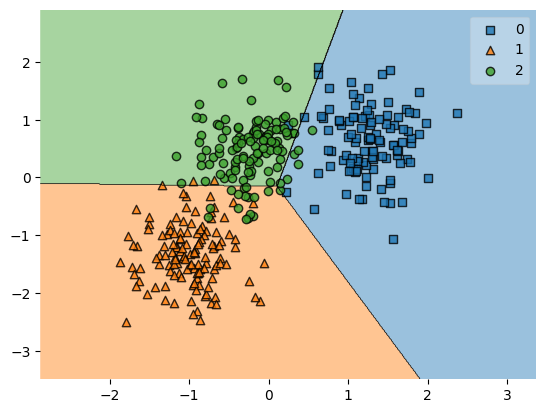

In [ ]:
plot_decision_regions(X_test,Y_test,clf=SGD6_Q1["log_loss"])

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(X, y, classifier, title):
    h = .02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

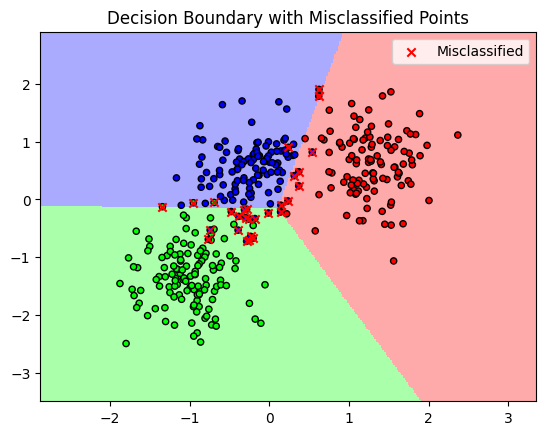

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Plot decision boundary with misclassified points
def plot_misclassified_points(X, y, classifier, misclassified_points, title):
    h = .02  # step size in the mesh
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

    # Plot misclassified points
    plt.scatter(misclassified_points[:, 0], misclassified_points[:, 1], marker='x', color='red', label='Misclassified')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.legend()
    plt.show()

# Plot decision boundary with misclassified points
plot_misclassified_points(X_test, Y_test, SGD6_Q1["log_loss"], X_test[SGD6_Q1["log_loss"].predict(X_test) != Y_test], "Decision Boundary with Misclassified Points")


# Q3

## Initaialize and Load Data


In [ ]:
main_df = pd.read_csv("Projects\\mini project 1\\Q3\\Dataset\\weatherHistory.csv")
temp = "Temperature (C)"
app_temp = "Apparent Temperature (C)"
humidity = "Humidity"
main_df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df = main_df[[temp,app_temp,humidity]]
df.head(5)

,Temperature (C),Apparent Temperature (C),Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86
2,9.377778,9.377778,0.89
3,8.288889,5.944444,0.83
4,8.755556,6.977778,0.83


## Section 1 - Covariance and Histogram of Data


                          Temperature (C)  Apparent Temperature (C)  Humidity
Temperature (C)                 91.232037                101.418283 -1.180462
Apparent Temperature (C)       101.418283                114.422544 -1.259941
Humidity                        -1.180462                 -1.259941  0.038210


<AxesSubplot:>

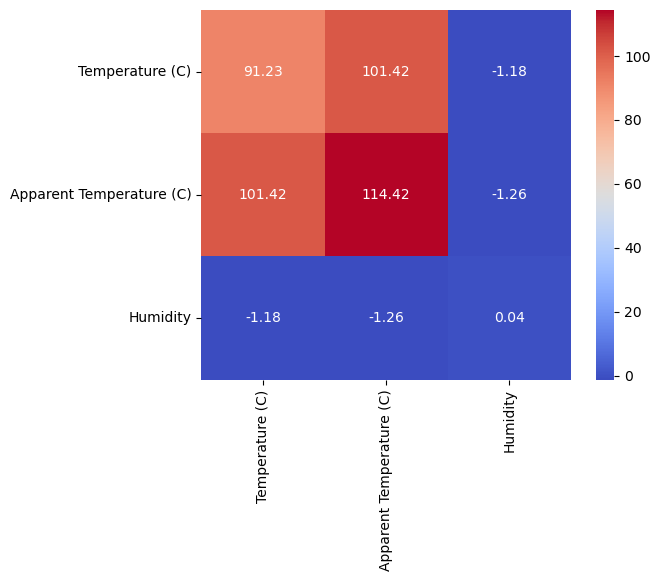

In [ ]:
covariance_matrix = df.cov()
print(covariance_matrix)
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)


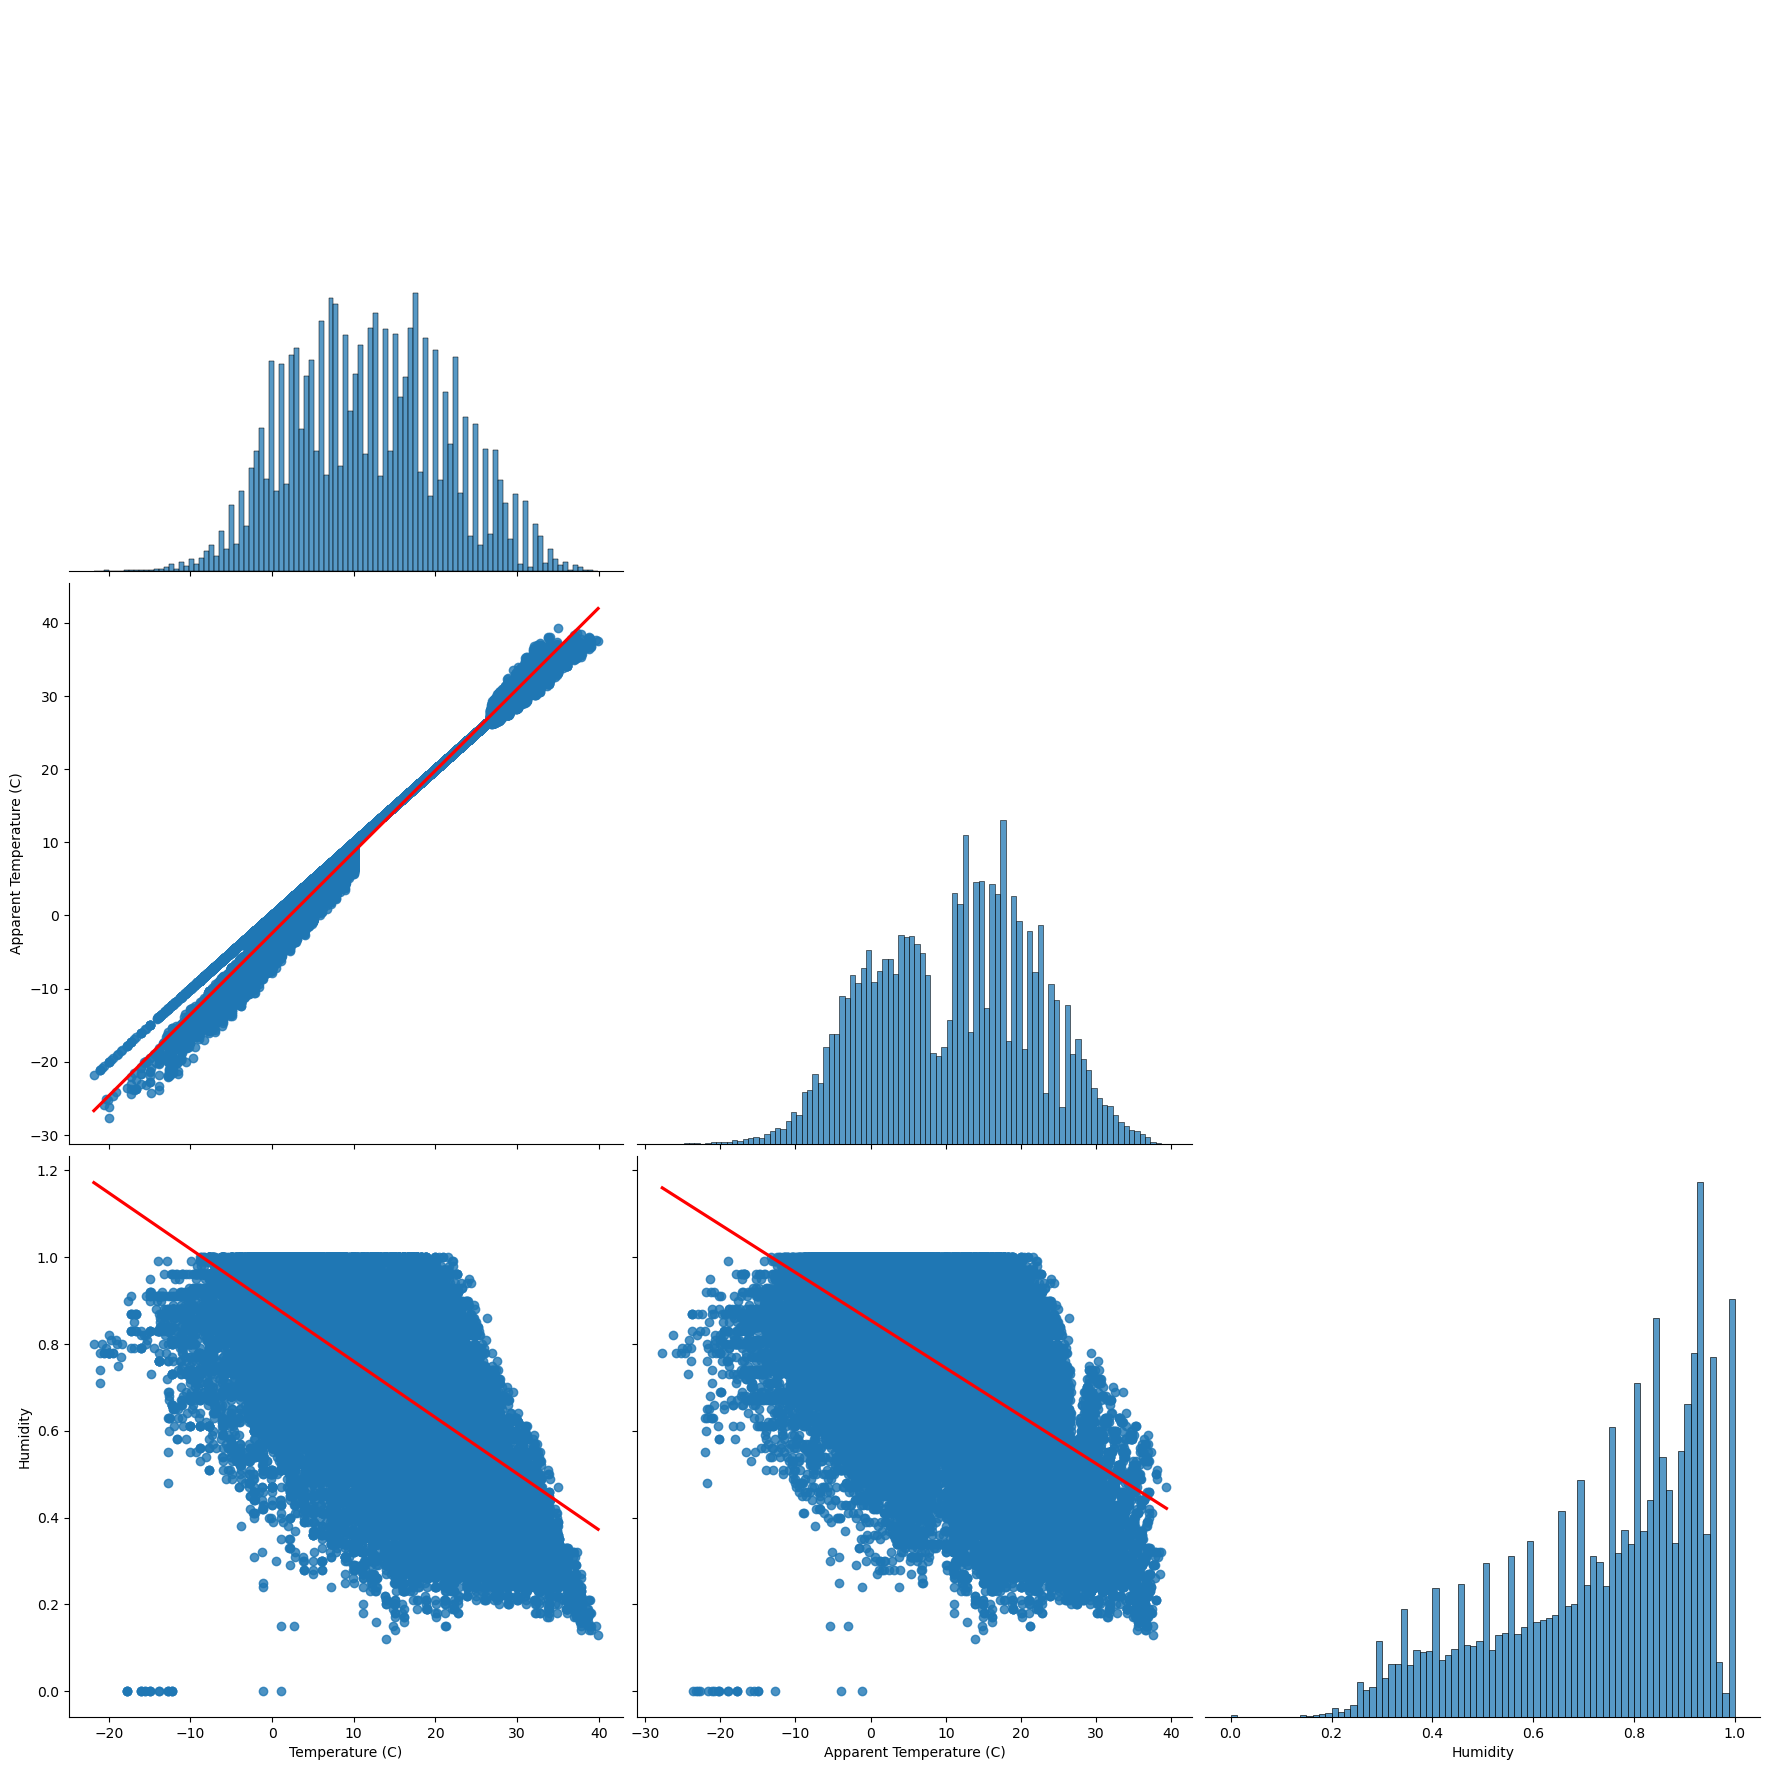

In [ ]:
sns.pairplot(df,kind='reg', height = 6, corner= True,plot_kws={'line_kws':{'color':'red'}})
plt.show()

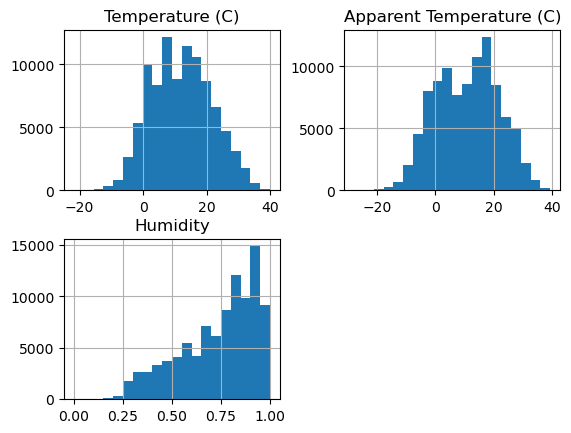

In [ ]:
histogram = df.hist(bins = 20)

## LS and RLS Approximation

In [ ]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=53)

temp_train = train_set[temp]
app_temp_train = train_set[app_temp]
humidity_train = train_set[humidity]

temp_test = test_set[temp]
app_temp_test = test_set[app_temp]
humidity_test = test_set[humidity]

app_temp_LS  = LinearRegression()
humidity_LS = LinearRegression()
temp_LS = LinearRegression()
dataset = {"Train":{"app_temp":(np.array([temp_train, humidity_train]).T, app_temp_train),
                    "humidity": (np.array([temp_train, app_temp_train]).T, humidity_train),
                    "temp":(np.array([app_temp_train, humidity_train]).T, temp_train)},
           "Test": {"app_temp":(np.array([temp_test, humidity_test]).T, app_temp_test),
                    "humidity": (np.array([temp_test, app_temp_test]).T, humidity_test),
                    "temp":(np.array([app_temp_test, humidity_test]).T, temp_test)}}

models = {"app_temp":app_temp_LS.fit(np.array([temp_train, humidity_train]).T, app_temp_train),
          "humidity": humidity_LS.fit(np.array([temp_train, app_temp_train]).T, humidity_train),
          "temp": temp_LS.fit(np.array([app_temp_train, humidity_train]).T, temp_train)}

In [ ]:
for model in models.keys():
    score = models[model].score(dataset["Train"][model][0],dataset["Train"][model][1])
    print(f"{model} accuracy on training set is equal to {score}")

    score = models[model].score(dataset["Test"][model][0],dataset["Test"][model][1])
    print(f"{model} accuracy on testset is equal to {score}\n")

app_temp accuracy on training set is equal to 0.9863194080189283
app_temp accuracy on testset is equal to 0.9864954840061168

humidity accuracy on training set is equal to 0.4424797955038111
humidity accuracy on testset is equal to 0.44192120432173676

temp accuracy on training set is equal to 0.9871057929817124
temp accuracy on testset is equal to 0.9872771524102542



In [ ]:
date = "Formatted Date"
df_with_date = main_df[[date,temp,app_temp,humidity]]
a = pd.to_datetime(df_with_date[date])
df_with_date[date].iloc[0]

'2006-04-01 00:00:00.000 +0200'

In [ ]:
df_with_date = main_df[[date,temp,app_temp,humidity]]
df_with_date[date] = pd.to_datetime(df_with_date[date],utc= True)

df_with_date['Formatted Date'] = df_with_date['Formatted Date'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
df_with_date[date] = pd.to_datetime(df_with_date[date])
df_with_date.set_index(date, inplace=True,)
pd.DatetimeIndex(df_with_date.index).to_period('M')

C:\Users\mamdaliof\AppData\Local\Temp\ipykernel_13336\983766743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_date[date] = pd.to_datetime(df_with_date[date],utc= True)
C:\Users\mamdaliof\AppData\Local\Temp\ipykernel_13336\983766743.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_date['Formatted Date'] = df_with_date['Formatted Date'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
C:\Users\mamdaliof\AppData\Local\Temp\ipykernel_13336\983766743.py:5: SettingWithCopyWarning: 
A value is trying t

In [ ]:
df_with_date.iloc[0]["name"]

KeyError: 'name'